In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
bbar = pickle.load(open("../../data/processed/tng100-trees-11_5/tng100_bbar.pkl", "rb"))
tbar = pickle.load(open("../../data/processed/tng100-trees-11_5/tng100_tbar.pkl", "rb"))
bdmo = pickle.load(open("../../data/processed/tng100-trees-11_5/tng100_bdmo.pkl", "rb"))
tdmo = pickle.load(open("../../data/processed/tng100-trees-11_5/tng100_tdmo.pkl", "rb"))
# matches = pickle.load(open("./cache/matches.pkl", "rb") )

bdmo.shape, tdmo.shape, bbar.shape, tbar.shape

((19049,), (19049, 100), (4038,), (4038, 100))

In [3]:
bbar.dtype, bdmo.dtype

(dtype([('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?')]),
 dtype([('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?')]))

In [4]:
tdmo.dtype, tbar.dtype

(dtype([('mdm', '<f4'), ('mvir', '<f4'), ('ok', '?'), ('is_sub', '?'), ('subfind_id', '<i8'), ('first_sub_idx', '<i8'), ('match', '<i8')]),
 dtype([('mdm', '<f4'), ('mvir', '<f4'), ('ok', '?'), ('is_sub', '?'), ('subfind_id', '<i8'), ('first_sub_idx', '<i8'), ('match', '<i8'), ('stellar_mass', '<f4')]))

In [5]:
tbar['subfind_id'][:, -1]

array([ 31342,     -1,     -1, ..., 563783, 569305, 571094], shape=(4038,))

In [6]:
a = np.array([0, 2, 6, 11])
b = np.array([0, 6])

In [7]:
np.isin(a, b), np.isin(b, a)

(array([ True, False,  True, False]), array([ True,  True]))

In [8]:
mask = np.isin(a,  b)
a[mask]

array([0, 6])

In [9]:
sum(bbar['is_err']), sum(bdmo['is_err'])

(np.int64(0), np.int64(0))

In [10]:
sum(tdmo['ok'][:, -1]), sum(tbar['ok'][:, -1])

(np.int64(14593), np.int64(3240))

In [11]:
tbar['ok'][:, -1]

array([ True, False, False, ...,  True,  True,  True], shape=(4038,))

In [12]:
_mpeak_pre_dmo= bdmo['mpeak_pre']
mask = _mpeak_pre_dmo > 0
mpeak_pre_dmo = _mpeak_pre_dmo[mask]

mpeak_pre_dmo.shape

(19049,)

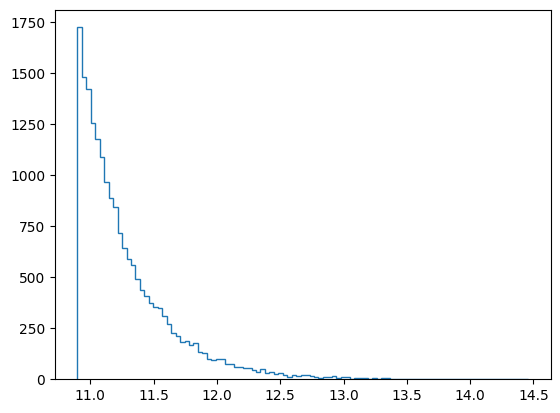

In [13]:
plt.hist(np.log10(mpeak_pre_dmo), bins=101, histtype='step');

In [14]:
_mpeak_pre_bar= bbar['mpeak_pre']
mask = _mpeak_pre_bar > 0
mpeak_pre_bar = _mpeak_pre_bar[mask]

mpeak_pre_bar.shape, sum(mask)

((4038,), np.int64(4038))

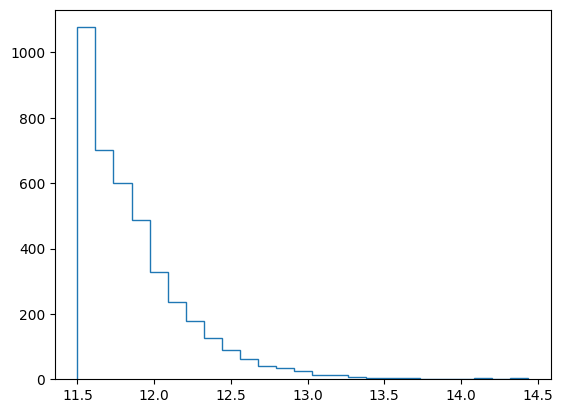

In [15]:
plt.hist(np.log10(mpeak_pre_bar), bins=25, histtype='step');

In [16]:
_stellar_mass = tbar['stellar_mass'][:, -1]
mask = _stellar_mass > 0
stellar_mass = _stellar_mass[mask]
stellar_mass.shape

(3240,)

In [17]:
np.all(tbar['ok'][:, -1] == mask)

np.True_

In [18]:
sum(tbar['ok'][:, -1]), sum(mask)

(np.int64(3240), np.int64(3240))

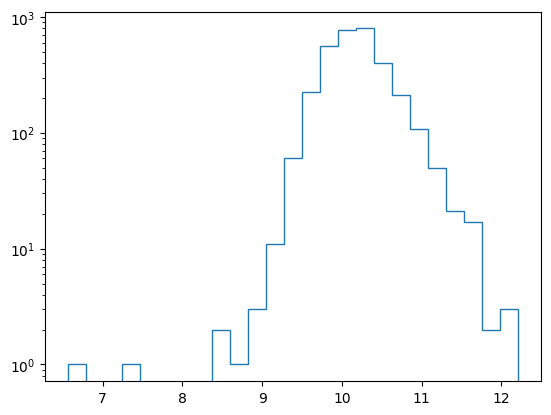

In [19]:
plt.hist(np.log10(stellar_mass), bins=25, histtype='step');
plt.yscale('log')

In [20]:
# plt.hist(stellar_mass, bins=51, histtype='step');
# plt.xscale('log')

## Get $t_{1/2}$

In [21]:
from multicam.tng.utils import get_mpeak_from_mah

In [22]:
import pandas as pd
mask_ok = tbar['ok'][:, -1]

mvir = tbar['mdm'][mask_ok]
n_snaps = 100
n_haloes = mvir.shape[0]
mah = np.zeros((n_haloes, n_snaps)) * np.nan

for ii in range(n_haloes):

    mdm = mvir[ii, :]
    mask = mdm == 0.0
    mdm[mask] = np.nan

    # linearly interpolate nan values
    mdm = pd.Series(mdm)
    mdm = mdm.interpolate(method="linear", limit_direction="both", axis=0)
    mah[ii] = mdm.values


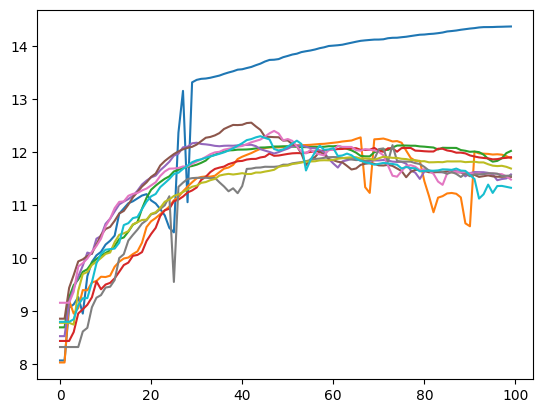

In [23]:
for ii in range(0, 10):
    plt.plot(np.log10(mah[ii]))

In [29]:
mpeak = get_mpeak_from_mah(np.log10(mah))
mpeak.shape

(3240, 100)

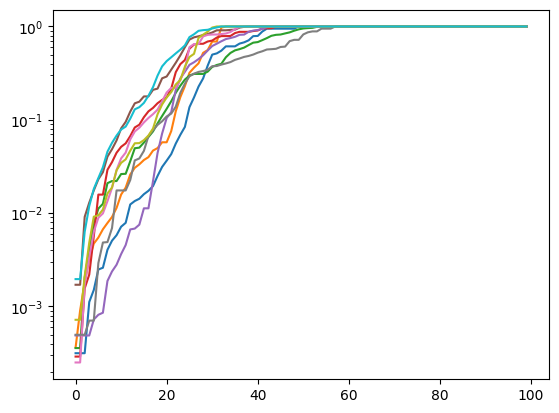

In [30]:
for ii in range(10, 20):
    plt.plot(mpeak[ii])
plt.yscale('log')

In [31]:
import pandas as pd
metadata = pd.read_csv("../../data/params/tng300-1-table.csv")
t12 = np.zeros(n_haloes)
for ii in range(n_haloes):
    mah_ii = mpeak[ii]
    idx = np.where(mpeak[ii, :]> 0.5)[0][0]
    t12[ii] = metadata['Redshift'][idx]

In [32]:
t12.shape

(3240,)

In [33]:
mpeak.shape

(3240, 100)

(array([301., 848., 937., 709., 247.,  99.,  70.,  10.,  16.,   3.]),
 array([0.01 , 0.509, 1.008, 1.507, 2.006, 2.505, 3.004, 3.503, 4.002,
        4.501, 5.   ]),
 <BarContainer object of 10 artists>)

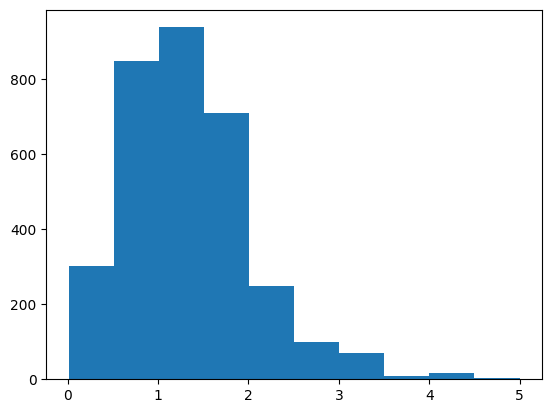

In [34]:
plt.hist(t12)

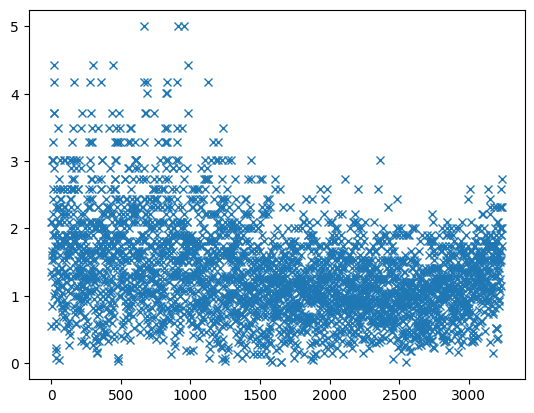

In [35]:
plt.plot(t12, 'x')

In [36]:
np.where(mpeak[0, :]> 0.5)[0][0]

np.int64(65)

In [37]:
mpeak[0, 64]

np.float64(0.49429567554244386)

In [38]:
mpeak.shape

(3240, 100)

In [39]:
sum(tbar['mvir'].mean(axis=1) == 0)

np.int64(0)

In [40]:
sum(tbar['mvir'][:, -1] < 1), sum(mask) + sum(tbar['mvir'][:, -1] < 1)

(np.int64(798), np.int64(799))

In [41]:
tbar['mvir'].shape

(4038, 100)

(array([  2., 569., 934., 484., 291., 228., 179., 202., 152., 199.]),
 array([10.94937611, 11.30794334, 11.66651058, 12.02507782, 12.38364506,
        12.7422123 , 13.10077858, 13.45934582, 13.81791306, 14.17648029,
        14.53504753]),
 <BarContainer object of 10 artists>)

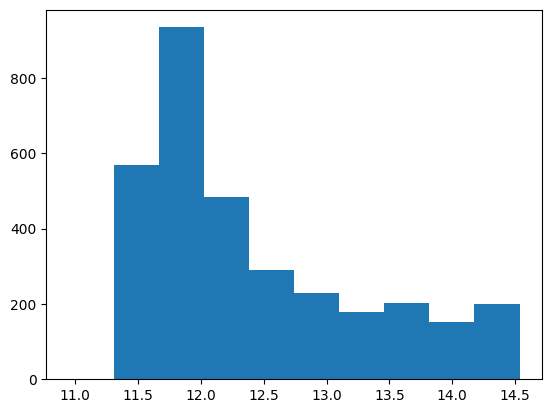

In [42]:
mask = tbar['mvir'][:, -1] > 0
plt.hist(np.log10(tbar['mvir'][mask, -1]))

In [43]:
mpeak_pre_bar.shape

(4038,)

In [49]:
mask = tbar['ok'][:, -1]
out = {
    'mpeak_pre': bbar['mpeak_pre'][mask],
    'stellar_mass': tbar['stellar_mass'][:, -1][mask],
    'a_1/2': 1 / (1 + t12),
    'mpeak': mpeak, 
    'subfind_id': tbar['subfind_id'][:, -1][mask],
}

np.savez("trees_tng100.npz", **out)


In [50]:
mpeak.shape

(3240, 100)

In [51]:
tbar['subfind_id'][:, -1].shape

(4038,)

In [52]:
sum(tbar['stellar_mass'][:, -1][mask] == 0)

np.int64(0)

In [53]:
mask.shape

(4038,)

In [54]:
bbar['mpeak_pre'].shape

(4038,)

(array([ 65., 380., 769., 877., 578., 270., 172.,  77.,  32.,  20.]),
 array([0.16666667, 0.2490099 , 0.33135314, 0.41369637, 0.4960396 ,
        0.57838284, 0.66072607, 0.74306931, 0.82541254, 0.90775578,
        0.99009901]),
 <BarContainer object of 10 artists>)

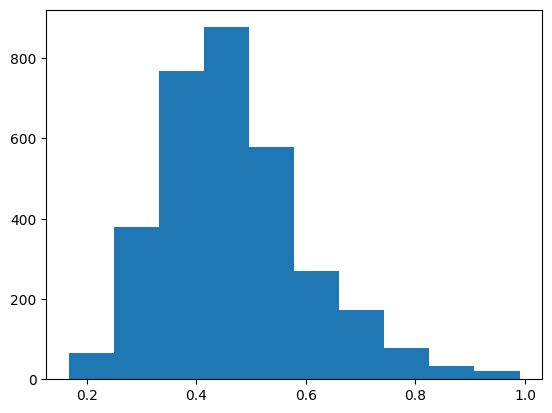

In [55]:
plt.hist(out['a_1/2'])

In [56]:
out2 = {} 
npzfile = np.load("trees_tng100.npz")
for k in npzfile.files:
    out2[k] = npzfile[k]
out2.keys()

dict_keys(['mpeak_pre', 'stellar_mass', 'a_1/2', 'mpeak', 'subfind_id'])

In [57]:
out2['mpeak'].shape

(3240, 100)